In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [216]:
df=pd.read_csv('/home/yeravellisanthosh/santhosh/Bangaluru_housing_model/Bengaluru_House_Data.csv')

In [217]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [218]:
df.shape

(13320, 9)

In [219]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [220]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [221]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [222]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [223]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [224]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# #Droping few columns that are not requried in building the model

In [225]:
df1=df.drop(['area_type', 'availability','society','balcony'],axis='columns')

In [226]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [227]:
df1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [228]:
df1['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
kadubisnahalli                 1
Sundara Nagar                  1
Electronic city phase 1,       1
Akash Nagar                    1
Kanakapur main road            1
Name: location, Length: 1305, dtype: int64

In [229]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

The data contains total 13320 records so droping the few null values records instead of imputing those null values with mean or median values

In [230]:
df2=df1.dropna()

In [231]:
df2.isnull().sum() #the data set df2 is with out null values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [232]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [233]:
df2['size'].unique() # The size are provide of one name in multiple forms so need to make all in one formate 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [234]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0])) # creating the new column BHK to make all the size into one formate 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [236]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [237]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [238]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [239]:
df2[~df2['total_sqft'].apply(is_float)].count() 

location      190
size          190
total_sqft    190
bath          190
price         190
bhk           190
dtype: int64

In [240]:
## there are total 190 records are given in the particular range and not in sqft units
##changing the range given values into avg values of those range and not in correct units are removed

In [241]:
def avg_total_sqrt(x):
    token=x.split('-')
    if(len(token)==2):
        return((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [242]:
df3=df2.copy()

In [243]:
df3['total_sqft']=df3['total_sqft'].apply(avg_total_sqrt)

In [244]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [245]:
df3[~df3['total_sqft'].apply(is_float)].count()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [246]:
#add a new column called price_per_sqft
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [247]:
#now check the number of location present in the data set df3
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [248]:
len(df3['location'].unique())

1304

In [249]:
#Removing the space present in the ending of the locations 
df4=df3.copy()
df4['location']=df4['location'].apply(lambda x: x.strip( ))
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [250]:
len(df4['location'].unique())

1293

In [251]:
locations_count=df4['location'].value_counts()
print(locations_count.head())
print("----------------------")
print(locations_count.tail())
print("-----------------")
print(len(locations_count))

Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64
----------------------
Virgonagar                 1
Aavalahalli                1
Akash Nagar                1
Kanakapura Road            1
mvj engineering college    1
Name: location, dtype: int64
-----------------
1293


In [252]:
#checking the locations having the value count less than ten
locations_count_lessthan_ten=locations_count[locations_count<10]
len(locations_count[locations_count<10])

1039

In [253]:
locations_count_lessthan_ten.head()

Mathikere           9
Richmond Town       9
Ejipura             9
Chennammana Kere    9
Kaverappa Layout    9
Name: location, dtype: int64

In [254]:
#Replacing the location those are having the value count less than 10 with the name others
df5=df4.copy()
df5['location']=df5['location'].apply(lambda x: 'others' if x in locations_count_lessthan_ten else x)

In [255]:
df5['location'].value_counts()

others                   2751
Whitefield                535
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            266
                         ... 
Dairy Circle               10
Dodsworth Layout           10
BTM 1st Stage              10
Gunjur Palya               10
1st Block Koramangala      10
Name: location, Length: 255, dtype: int64

In [256]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [257]:
#Considering the 1BHK has the sqrt of 300 and 2BHK will 600 .
#In case if you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [258]:
# total 744 records are the outliers having less area than the of 1 bhk having less than 300sqft
df5[df5.total_sqft/df5.bhk<300].count() 

location          744
size              744
total_sqft        744
bath              744
price             744
bhk               744
price_per_sqft    744
dtype: int64

In [259]:
df5.shape

(13246, 7)

In [260]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [261]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
We should remove outliers per location using mean and one standard deviation

In [262]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduce_df=subdf[(subdf.price_per_sqft>(mean-sd)) & (subdf.price_per_sqft<=(mean+sd))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out                
df7=remove_pps_outliers(df6)
df7.shape

(10222, 7)

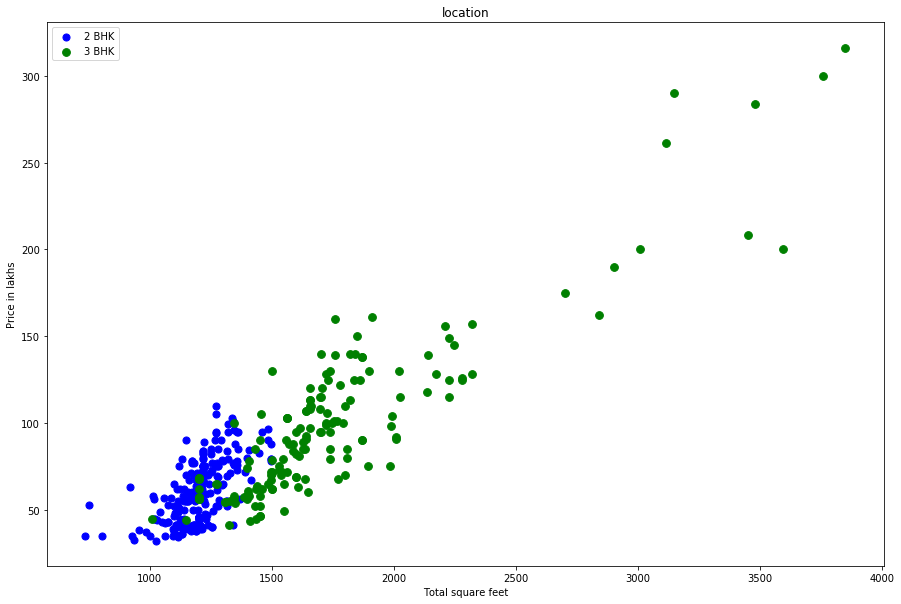

In [263]:
def scatter_plot_location(df,location):
    bhk2=df[(df['location']==location) & (df.bhk==2)]
    bhk3=df[(df['location']==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=60)
    plt.xlabel("Total square feet")
    plt.ylabel("Price in lakhs")
    plt.title("location")
    plt.legend()

    
scatter_plot_location(df7,'Whitefield')

For eaxmple in this area called Whitefield the few three BHKS are less price than the 2 BHK and also some 2 BHKS are more
price than the 3 BHKS which is unusual

In [264]:
def removal_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,df_location in df.groupby('location'):
        bhk_stats={}
        for bhk,df_bhk in df_location.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(df_bhk.price_per_sqft),
                'std':  np.std(df_bhk.price_per_sqft),
                'count': df_bhk.shape[0]
        }
        for bhk, bhk_df in df_location.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df8=removal_bhk_outliers(df7)

In [265]:
df8.shape

(7369, 7)

Now the 3BHk having less price than 2 BHK and also 2BHk having more price than 3 BHK are removed most of them

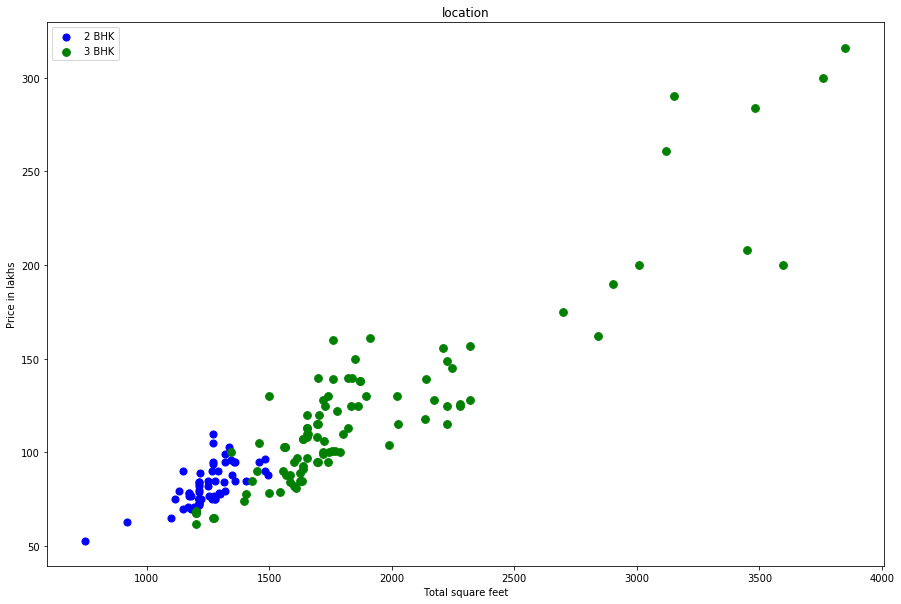

In [266]:
scatter_plot_location(df8,'Whitefield')

In [267]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [268]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [269]:
df8.bath.value_counts()

2.0     4227
3.0     1769
1.0      567
4.0      507
5.0      176
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
14.0       1
Name: bath, dtype: int64

Text(0, 0.5, 'count')

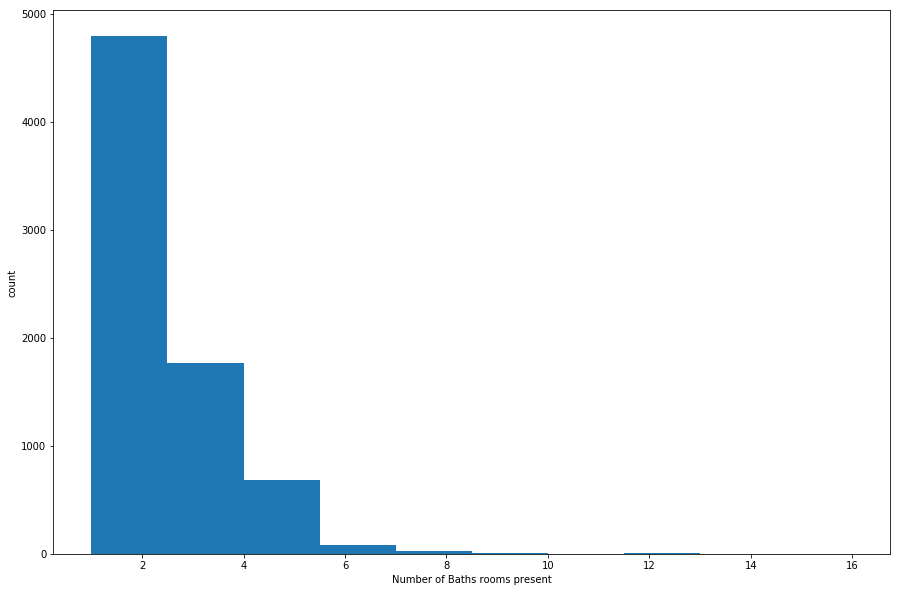

In [270]:
plt.hist(df8.bath)
plt.xlabel("Number of Baths rooms present")
plt.ylabel("count")

considering it is unusual to have 2 more bathrooms than number of bedrooms in a home

In [271]:
df8[df8['bath']>(df8['bhk']+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [272]:
df9=df8[~(df8['bath']>(df8['bhk']+2))]
df9.shape

(7364, 7)

In [273]:
df8.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

Droping the columns that are not reuriqed in the model

In [274]:
df9=df8.drop(['size','price_per_sqft'],axis='columns')

In [275]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [280]:
location_dummies=pd.get_dummies(df9['location'])
location_dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
df10=pd.concat([df9,location_dummies.drop('others',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df10.shape

(7369, 259)

In [288]:
df11=df10.drop('location',axis='columns')
df11.shape

(7369, 258)

In [289]:
df11.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=258)

In [292]:
X=df11.drop('price',axis='columns')
X.shape

(7369, 257)

In [298]:
Y=df11.price
Y.shape

(7369,)

In [299]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=10)

In [300]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf=lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8759867884669474

In [302]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.85161052, 0.78856069, 0.86218103, 0.90056286, 0.86506825])

In [304]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [318]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [319]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,lasso,0.700987,"{'alpha': 1, 'selection': 'random'}"
1,linear_regression,0.853597,{'normalize': True}
2,decision_tree,0.762900,"{'splitter': 'random', 'criterion': 'friedman_..."


Test the model for few properties

In [332]:
def predict_model(location,sqft,bath,bhk):
    location_index=np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location_index >= 0:
        x[location_index] = 1

    return lr_clf.predict([x])[0]

In [333]:
predict_model('1st Phase JP Nagar',2000, 2, 3)

161.98641856195178